In [226]:
#import library

import pandas as pd
import numpy as np

# Visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing & ML
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Evaluasi
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [227]:
#load data

df = pd.read_csv("Data Survei.csv", sep=";")

display(df.head())

,Tanggal Waktu,Usia,Gender,Status Kerja,Lama Bekerja,Biaya Transport,Pengaruh Biaya Transportasi ke Motivasi,Subsidi Transportasi Kantor,Persetujuan Subsidi Jika Belum Ada,Kepuasan terhadap Kebijakan Subsidi Transportasi,...,Kenyamanan Moda Transportasi,Pernah Ganti Moda untuk Efisiensi,Alasan Ganti Moda Transportasi,Frekuensi Onsite per Minggu,Frekuensi Dampak Fisik dari Perjalanan,Dampak Fisik Perjalanan Kantor,Pengaruh Transportasi ke Konsentrasi Kerja,Pengaruh Moda Transportasi ke Produktivitas,Faktor Transportasi Terhadap Produktivitas,Persetujuan Solusi Transportasi untuk Produktivitas
0,05/12/2025,45 tahun ke atas,Laki laki,Karyawan tetap (penuh waktu),> 6 tahun,Rp20.000–Rp50.000,5,Tidak,Ya,2,...,3,Tidak,NaN,5 hari,5,Membuat saya merasa lelah,4,4,Biaya transportasi yang tinggi,5
1,05/12/2025,25–34 tahun,Laki laki,Karyawan tetap (penuh waktu),4–6 tahun,Rp20.000–Rp50.000,5,Tidak,Ya,1,...,4,Tidak,NaN,5 hari,5,Membuat saya merasa lelah,4,4,Kemacetan lalu lintas,5
2,05/12/2025,< 25 Tahun,Laki laki,Karyawan Kontrak,< 1 tahun,Rp20.000–Rp50.000,5,Tidak,Ya,2,...,4,Ya,efisiensi biaya,5 hari,5,Membuat saya merasa lelah,5,5,Waktu tempuh yang lama,5
3,12/5/2025 18:14:29,25–34 tahun,Perempuan,Karyawan paruh waktu,1–3 tahun,< Rp20.000,3,Ya,Ya,4,...,3,Ya,efisiensi jarak,1 - 2 hari,4,Membuat saya merasa lelah,4,4,Kemacetan lalu lintas,4
4,05/12/2025,25–34 tahun,Perempuan,Karyawan tetap (penuh waktu),4–6 tahun,Rp50.000–Rp100.000,4,Tidak,Ya,2,...,4,Ya,efisiensi jarak,5 hari,4,Membuat saya merasa lelah,4,5,Waktu tempuh yang lama,4


In [228]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2024 entries, 0 to 2023
Data columns (total 27 columns):
 #   Column                                               Non-Null Count  Dtype 
---  ------                                               --------------  ----- 
 0   Tanggal Waktu                                        2024 non-null   object
 1   Usia                                                 2024 non-null   object
 2   Gender                                               2024 non-null   object
 3   Status Kerja                                         2023 non-null   object
 4   Lama Bekerja                                         2024 non-null   object
 5   Biaya Transport                                      2024 non-null   object
 6   Pengaruh Biaya Transportasi ke Motivasi              2024 non-null   int64 
 7   Subsidi Transportasi Kantor                          2024 non-null   object
 8   Persetujuan Subsidi Jika Belum Ada                   2024 non-null   object
 9

In [229]:
#data cleaning

# jumlah missing value per kolom
print(df.isnull().sum())

# kalau mau lihat total keseluruhan missing value
print("\nTotal missing value di seluruh dataset:", df.isnull().sum().sum())

Tanggal Waktu                                             0
Usia                                                      0
Gender                                                    0
Status Kerja                                              1
Lama Bekerja                                              0
Biaya Transport                                           0
Pengaruh Biaya Transportasi ke Motivasi                   0
Subsidi Transportasi Kantor                               0
Persetujuan Subsidi Jika Belum Ada                        0
Kepuasan terhadap Kebijakan Subsidi Transportasi          0
Pengaruh Biaya Transportasi ke Pengeluaran                0
Jarak                                                     0
Waktu Tempuh                                              0
Pengaruh Jarak ke Kehadiran                               0
Frekuensi Terlambat karena Kemacetan                      0
Frekuensi Terlambat karena Jarak                          0
Moda transportasi                       

In [230]:
# Isi missing value
df["Status Kerja "] = df["Status Kerja "].fillna(
    df["Status Kerja "].mode()[0]
)

df["Alasan Ganti Moda Transportasi"] = df["Alasan Ganti Moda Transportasi"].fillna(
    "Tidak diisi"
)

print("\nCek ulang missing value setelah ditangani:")
print(df.isnull().sum())


Cek ulang missing value setelah ditangani:
Tanggal Waktu                                          0
Usia                                                   0
Gender                                                 0
Status Kerja                                           0
Lama Bekerja                                           0
Biaya Transport                                        0
Pengaruh Biaya Transportasi ke Motivasi                0
Subsidi Transportasi Kantor                            0
Persetujuan Subsidi Jika Belum Ada                     0
Kepuasan terhadap Kebijakan Subsidi Transportasi       0
Pengaruh Biaya Transportasi ke Pengeluaran             0
Jarak                                                  0
Waktu Tempuh                                           0
Pengaruh Jarak ke Kehadiran                            0
Frekuensi Terlambat karena Kemacetan                   0
Frekuensi Terlambat karena Jarak                       0
Moda transportasi                           

In [231]:
#preprocessing biaya

biaya_map = {
    "< Rp20.000": 1,
    "Rp20.000–Rp50.000": 2,
    "Rp50.000–Rp75.000": 3,
    "Rp75.000–Rp100.000": 4,
    "Rp50.000–Rp100.000": 5,
    "> Rp100.000": 6
}

df["Biaya_Encoded"] = df["Biaya Transport"].map(biaya_map)

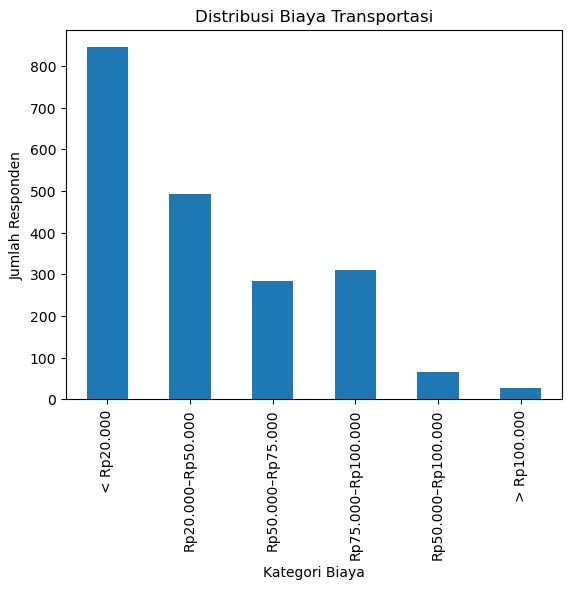

In [235]:
#visualisasi biaya

label_biaya = {v: k for k, v in biaya_map.items()}

plt.figure()
df["Biaya_Encoded"].value_counts().sort_index().rename(index=label_biaya).plot(kind="bar")
plt.title("Distribusi Biaya Transportasi")
plt.xlabel("Kategori Biaya")
plt.ylabel("Jumlah Responden")
plt.show()


In [180]:
#preprocessing jarak

jarak_map = {
    "< 5 km": 1,
    "5–10 km": 2,
    "11–20 km": 3,
    "> 20 km": 4
}

df["Jarak_Encoded"] = df["Jarak"].map(jarak_map)


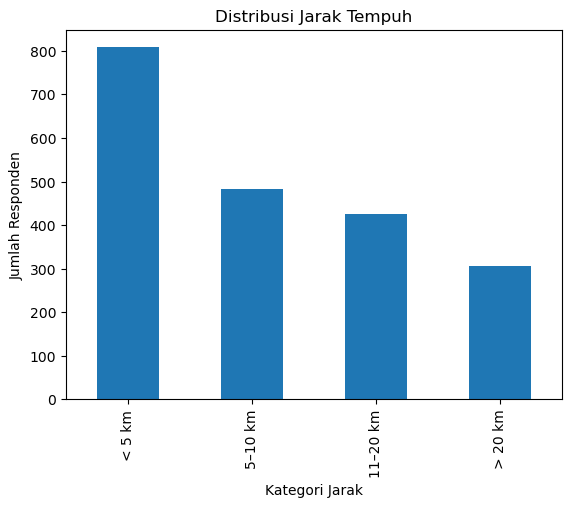

In [234]:
#visualisasi jarak

urutan_jarak = ["< 5 km", "5–10 km", "11–20 km", "> 20 km"]

plt.figure()
df["Jarak"].value_counts().reindex(urutan_jarak).plot(kind="bar")
plt.title("Distribusi Jarak Tempuh")
plt.xlabel("Kategori Jarak")
plt.ylabel("Jumlah Responden")
plt.show()



In [181]:
#preprocessing moda transport

le = LabelEncoder()
df["Moda_Encoded"] = le.fit_transform(df["Moda transportasi"])

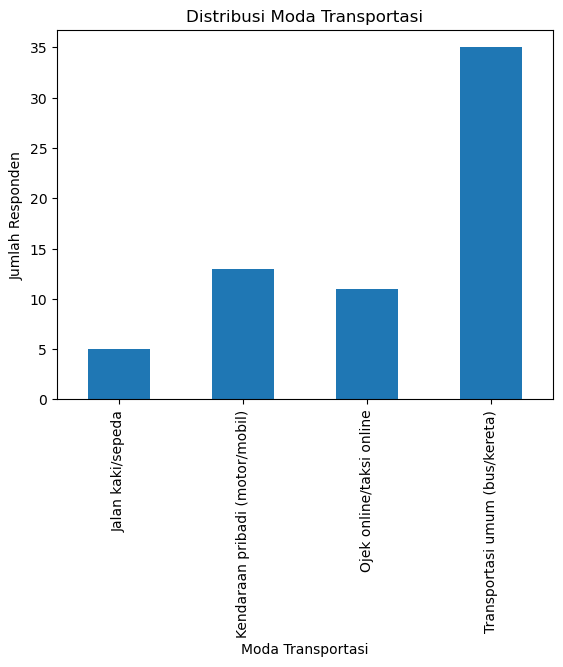

In [165]:
#visualisasi moda transport

plt.figure()
df["Moda transportasi"].value_counts().sort_index().plot(kind="bar")
plt.title("Distribusi Moda Transportasi")
plt.xlabel("Moda Transportasi")
plt.ylabel("Jumlah Responden")
plt.show()


In [183]:
#feature engineering

cols_pengaruh = [
    "Pengaruh Moda Transportasi ke Produktivitas",
    "Pengaruh Jarak ke Kehadiran",
    "Pengaruh Biaya Transportasi ke Motivasi"
]

df[cols_pengaruh] = df[cols_pengaruh].astype(int)

In [167]:
df["Skor_Pengaruh"] = df[cols_pengaruh].mean(axis=1)


In [168]:
df["Target_Pengaruh"] = df["Skor_Pengaruh"].apply(
    lambda x: 1 if x >= 3 else 0
)


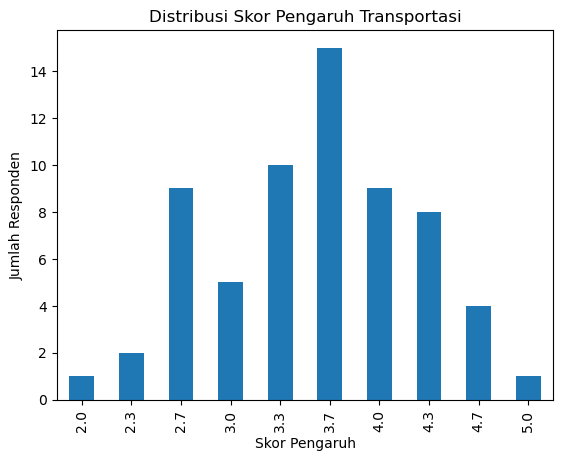

In [169]:
#visualisasi pengaruh terhadap produktifitas

plt.figure()
df["Skor_Pengaruh"].round(1).value_counts().sort_index().plot(kind="bar")
plt.title("Distribusi Skor Pengaruh Transportasi")
plt.xlabel("Skor Pengaruh")
plt.ylabel("Jumlah Responden")
plt.show()


In [170]:
X = df[["Biaya_Encoded", "Jarak_Encoded", "Moda_Encoded"]]
y = df["Target_Pengaruh"]


In [184]:
#data splitting

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [186]:
#modelling logistic regression

lr = LogisticRegression(
    max_iter=1000,
    class_weight="balanced"
)

lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)


In [187]:
#evaluasi logistic regression

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr, zero_division=0))


Logistic Regression Accuracy: 0.8461538461538461
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         2
           1       1.00      0.82      0.90        11

    accuracy                           0.85        13
   macro avg       0.75      0.91      0.78        13
weighted avg       0.92      0.85      0.86        13



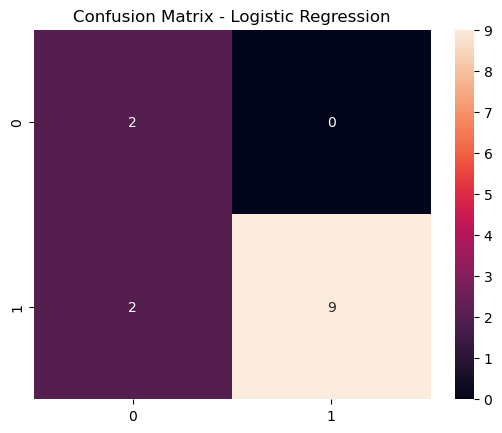

In [188]:
#visualisasi logistic regression

sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt="d")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()


In [190]:
#modelling random forest

rf = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    class_weight="balanced"
)

rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)


In [191]:
#evaluasi random forest

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf, zero_division=0))


Random Forest Accuracy: 0.8461538461538461
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         2
           1       1.00      0.82      0.90        11

    accuracy                           0.85        13
   macro avg       0.75      0.91      0.78        13
weighted avg       0.92      0.85      0.86        13



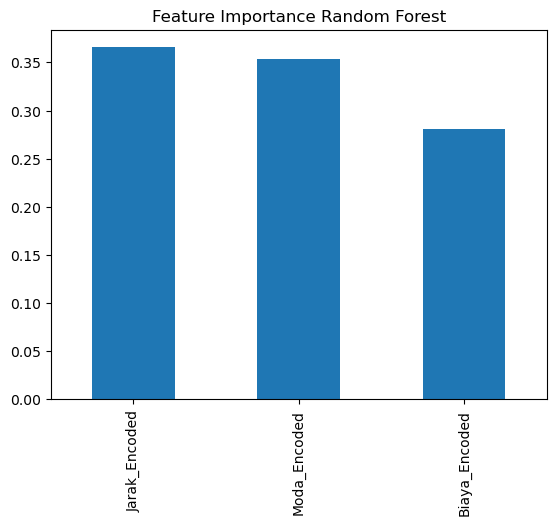

In [192]:
#visualisasi random forest

pd.Series(
    rf.feature_importances_,
    index=X.columns
).sort_values(ascending=False).plot(kind="bar")

plt.title("Feature Importance Random Forest")
plt.show()
